<a href="https://colab.research.google.com/github/thisismcgovern/Heartbeat-Classification-Using-LSTM-Neural-Network/blob/main/Heartbeat_Classification_Using_LSTM_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf ~/.kaggle
!rm -f kaggle.json
!rm -rf /content/sample_data


In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thisismcgovern","key":"2de9d7f5f5c610454581a99a2c59f1cb"}'}

In [3]:
!ls


kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!mv "kaggle.json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [24]:
!kaggle datasets list | head


ref                                                             title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset    Global Earthquake-Tsunami Risk Assessment Dataset       16151  2025-10-01 16:35:53.273000          17918        615  1.0              
jaderz/hospital-beds-management                                 Hospital Beds Management                                47583  2025-10-03 09:21:58.590000          15140        356  1.0              
jockeroika/life-style-data                                      Life Style Data                                       3995645  2025-10-14 13:50:45.303000          20875        406  0.8235294        
rehan

In [5]:
!kaggle datasets download -d shayanfazeli/heartbeat
!unzip heartbeat.zip

Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
  0% 0.00/98.8M [00:00<?, ?B/s]
100% 98.8M/98.8M [00:00<00:00, 1.42GB/s]
Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [7]:
import pandas as pd
train = pd.read_csv("mitbih_train.csv", header=None)
test = pd.read_csv("mitbih_test.csv", header=None)

print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()


Train shape: (87554, 188)
Test shape: (21892, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
import numpy as np

# Split into features and labels
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

# Reshape the data to fit LSTM input: (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (87554, 187, 1)
X_test shape: (21892, 187, 1)


In [11]:
!pip install tensorflow
!pip install keras

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# One-hot encode labels (since we have 5 classes)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build the LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes for heartbeat types
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test, y_test_cat))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 159s 115ms/step - accuracy: 0.8228 - loss: 0.7241 - val_accuracy: 0.8281 - val_loss: 0.6536
Epoch 2/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 155s 114ms/step - accuracy: 0.8284 - loss: 0.6492 - val_accuracy: 0.8277 - val_loss: 0.6197
Epoch 3/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 202s 114ms/step - accuracy: 0.8277 - loss: 0.6459 - val_accuracy: 0.8276 - val_loss: 0.6579
Epoch 4/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 201s 113ms/step - accuracy: 0.8282 - loss: 0.6585 - val_accuracy: 0.8276 - val_loss: 0.6553
Epoch 5/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 154s 112ms/step - accuracy: 0.8286 - loss: 0.6499 - val_accuracy: 0.8276 - val_loss: 0.6050


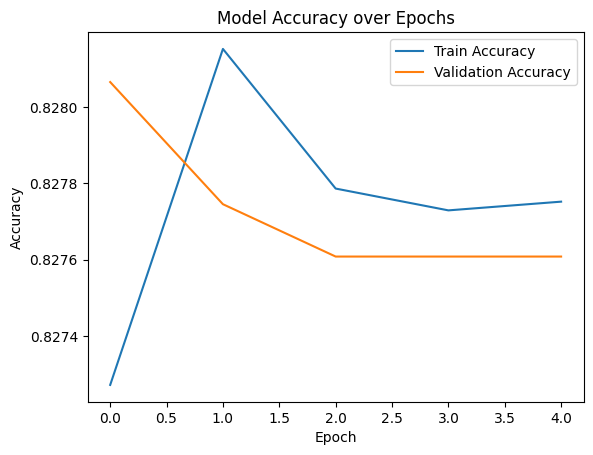

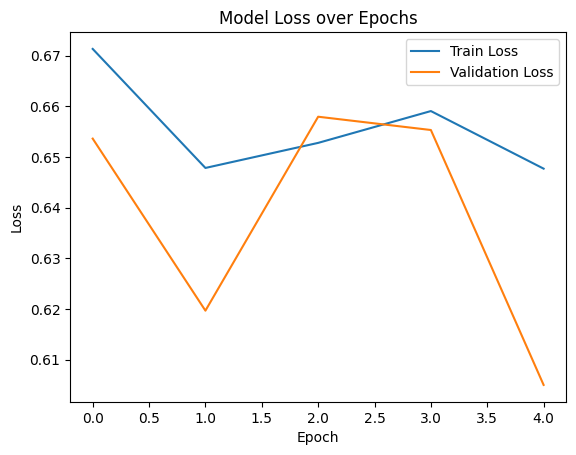

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


685/685 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step


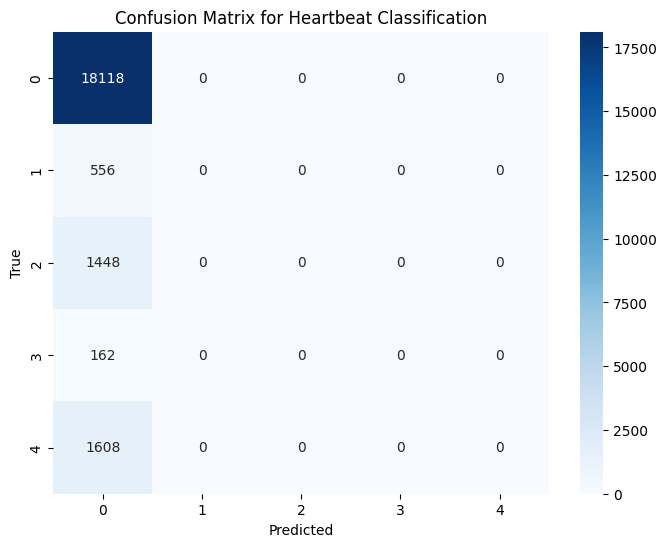

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     18118
         1.0       0.00      0.00      0.00       556
         2.0       0.00      0.00      0.00      1448
         3.0       0.00      0.00      0.00       162
         4.0       0.00      0.00      0.00      1608

    accuracy                           0.83     21892
   macro avg       0.17      0.20      0.18     21892
weighted avg       0.68      0.83      0.75     21892



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Heartbeat Classification')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred_classes))
